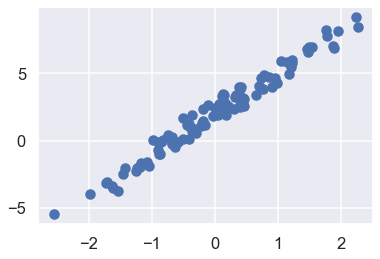

In [52]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import statsmodels.api as sm


# generate some random data
np.random.seed(0)
x = np.random.normal(0, 1, 100)
y = 2 + 3 * x + np.random.normal(0, 0.5, 100)

plt.scatter(x, y)

This will fit a linear regression model of the form y = beta0 + beta1 * x to the generated data and print a summary of the results, including the estimated coefficients, t-statistics, p-values, and R-squared statistic.

<AxesSubplot:>

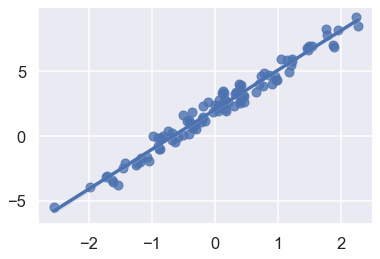

In [53]:
sns.regplot(x,y)

In [54]:
# add a constant to x to include the intercept in the regression
x = sm.add_constant(x)

# fit the regression model
model = sm.OLS(y, x)
results = model.fit()

# print the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     3521.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           1.29e-78
Time:                        10:18:32   Log-Likelihood:                -75.359
No. Observations:                 100   AIC:                             154.7
Df Residuals:                      98   BIC:                             159.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0376      0.052     39.167      0.0

### Modeling House price Data

In [55]:
house_size=[1400,1600,1700,1875,1100,1550,2350,2450,1425,1700]
house_price=[245000,312000,279000,302000,200000,270000,403000,450000,255000,294000]
house_df=pd.DataFrame({"house_size":house_size,"house_price":house_price})

checking the relationship between house_size and house price 

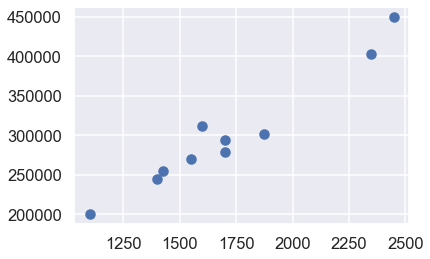

In [56]:
plt.scatter(house_size, house_price)

we can use this data to fit a linear regression model that predicts the house price based on the size of the house. The model will be of the form `Price = intercept + slope * Size`, where intercept is the y-intercept of the line and slope is the coefficient that represents the change in price per square foot of house size. The goal of the regression is to find the values of intercept and slope that best fit the data.

In [68]:
# add a constant to x to include the intercept in the regression
house_size = sm.add_constant(house_size)

# fit the regression model
model = sm.OLS(house_price, house_size)
results = model.fit()

# print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     141.6
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           2.28e-06
Time:                        10:19:49   Log-Likelihood:                -111.18
No. Observations:                  10   AIC:                             226.4
Df Residuals:                       8   BIC:                             227.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4353.5635   2.56e+04      0.170      0.8

/opt/anaconda3/envs/DA/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Model paramters interpretation

In [69]:
print(results.params)

[4353.56347439  172.97168311]


In a linear regression model that predicts house price based on house size, the intercept and slope can be interpreted as follows:

`Intercept`: The y-intercept of the regression line represents the house price when the house size is zero. In this context, it doesn't make sense to have a house with zero size, but mathematically the intercept provides an anchor point for the line.

Slope: The slope of the regression line represents the change in the house price for each unit increase in house size (per square foot, in this case). A positive slope means that as the house size increases, the house price also increases. The magnitude of the slope represents the rate of change in house price for a unit increase in house size.

So, given the values of intercept and slope, you can use the regression line to predict the house price for a given house size. For example, if the intercept is 4353.6 and the slope is 172.97, then for a house with 1400 square feet, you can predict the house price as `4353.6 + 172.97 * 1400 = 246511.6` , which is consistent with the data.

It's important to note that the intercept and slope coefficients are estimates based on the data, and they may not always be accurate in predicting future house prices. The goodness of fit of the model and the accuracy of the predictions can be evaluated using metrics like R-squared, residuals, and prediction intervals.

In [70]:
predictions = results.predict(house_size)
predictions

array([246513.91982183, 281108.25644289, 298405.42475342, 328675.46929685,
       194622.41489023, 272459.67228762, 410837.01877187, 428134.18708241,
       250838.21189946, 298405.42475342])

<AxesSubplot:xlabel='house_size', ylabel='house_price'>

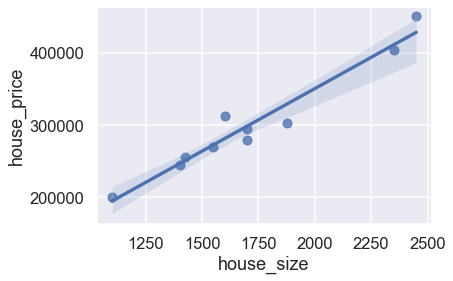

In [59]:
sns.regplot(x="house_size", y="house_price", data=house_df)

## Multiple Linear regression

In [60]:
import seaborn as sns
import pandas as pd
data = pd.read_csv(r'Data/Fitbit2.csv')
data.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


<AxesSubplot:xlabel='NumberOfAwakings', ylabel='MinutesOfBeingAwake'>

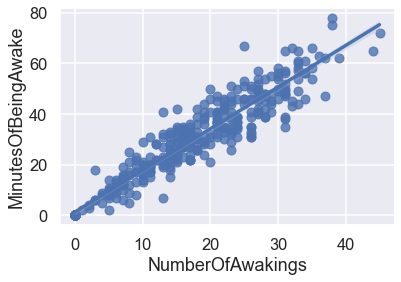

In [61]:
sns.regplot(x="NumberOfAwakings", y="MinutesOfBeingAwake", data=data)

In [62]:
from scipy import stats
X = data['NumberOfAwakings']
Y = data['MinutesOfBeingAwake']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 1.6405141436199782
The intercept is: 1.438103352378338


Multiple linear regression


In [63]:
X=data[["Minutes Sedentary","Minutes Lightly Active", "Minutes Fairly Active", "Minutes Very Active","Activity Calories"]]
X

,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,1.355,46,0,0,1680
1,611.000,316,61,60,2248
2,602.000,226,14,77,1719
3,749.000,190,23,4,9620
4,876.000,171,0,0,7360
...,...,...,...,...,...
362,599.000,275,49,79,236
363,684.000,333,10,55,2075
364,701.000,287,29,90,2249
365,575.000,298,8,85,2112


In [64]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
predictions = results.predict(X)

In [65]:
results.params

const                     12.151684
Minutes Sedentary          0.011452
Minutes Lightly Active     0.016812
Minutes Fairly Active      0.068821
Minutes Very Active        0.054627
Activity Calories          0.000818
dtype: float64

In [66]:
predictions

0      14.314663
1      33.775774
2      29.421001
3      33.593107
4      31.078159
         ...    
362    31.515472
363    30.973043
364    33.756238
365    30.667818
366    27.583879
Length: 367, dtype: float64

#### Error metrics 
The mean squared error (MSE) is a measure of the average deviation of the predictions from the actual values. A lower MSE indicates a better fit.

The R-squared score is a measure of the goodness of fit of the model, with a value of 1 indicating a perfect fit and a value close to 0 indicating a poor fit.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(Y, predictions))
r2_score(Y, predictions)

321.0576716770921


0.06355502904761878

#### Another Example

In [9]:
from scipy.stats import linregress

auto = pd.read_csv(r'Data/auto-mpg.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [10]:
slope, intercept, r_value, p_value, std_err = linregress(auto.acceleration, auto.mpg)
slope, intercept, r_value, p_value, std_err

(1.1912045293502274,
 4.9697930042539085,
 0.4202889121016507,
 1.8230915350787203e-18,
 0.12923643283101396)

In [11]:
import statsmodels.api as sm

X = sm.add_constant(auto.acceleration) # We must add the intercept using the add_constant function
Y = auto.mpg

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     84.96
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           1.82e-18
Time:                        18:20:23   Log-Likelihood:                -1343.9
No. Observations:                 398   AIC:                             2692.
Df Residuals:                     396   BIC:                             2700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.9698      2.043      2.432   

In [12]:
X = sm.add_constant(auto[['cylinders', 'weight', 'acceleration']]) # adding a constant
Y = auto.mpg

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     306.7
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          1.14e-102
Time:                        18:20:26   Log-Likelihood:                -1142.9
No. Observations:                 398   AIC:                             2294.
Df Residuals:                     394   BIC:                             2310.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.3811      1.960     21.627   

## linear regression using Scipy

In the example below will fit a linear regression model of the form y = intercept + slope * x to the generated data and print the estimated coefficients, intercept and slope. The function linregress returns several statistics related to the fit, including the slope and intercept, the coefficient of determination (r_value), the two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero, and the standard error of the estimated slope (std_err).

In [34]:
import numpy as np
from scipy.stats import linregress

# generate some random data
np.random.seed(0)
x = np.random.normal(0, 1, 100)
y = 2 + 3 * x + np.random.normal(0, 0.5, 100)

# fit the regression model
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# print the estimated coefficients
print("Intercept:", intercept, "Slope:", slope)


Intercept: 2.0375765425262573 Slope: 3.05734921677319


## Regression Simulator

In [31]:
from ipywidgets import interactive
import ipywidgets as widgets

In [32]:
#@title Interactive plot
sns.set()
sns.set_context("talk")


def plot_regression(slope, intercept):
    # Fixing the seed of the random number generator for reproducibility of the fake data
    np.random.seed(50)
    x = np.arange(1, 101)
    y = 3 * x + 20 + np.random.normal(0, 30, 100)
    y_pred = slope * x + intercept
    mse = np.mean((y-y_pred)**2)
    plt.plot(x, y, "o")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Scatter plot with the regression line")

    # We define two points to construct the line. Every line is defined by two points.
    x1, y1 = 0, intercept
    x2, y2 = 100, intercept + slope * 100
    l1 = [(x1, y1), (x2,y2)]
    
    lc = LineCollection([l1], color=["black"], lw=2)

    plt.gca().add_collection(lc)

    plt.show()
    
    print("The mean squared error (MSE) is: {:.2f} cm2".format(mse))
    print("The root mean square (RMSE) is: {:.2f} cm".format(np.sqrt(mse)))
    
#interactive_plot = interactive(plot_regression, alpha=(0,30), beta=(-100,100))
interactive_plot = interactive(plot_regression, slope=widgets.FloatSlider(min=0, max=40, step=0.5, value=0), 
                               intercept=widgets.FloatSlider(min=0, max=200, step=10, value=200))

interactive_plot

interactive(children=(FloatSlider(value=0.0, description='slope', max=40.0, step=0.5), FloatSlider(value=200.0…